<a href="https://colab.research.google.com/github/dharalakshmi/Sales-Prediction/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import preprocessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Load Dataset
df = pd.read_csv("/mnt/advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  200
Number of columns are:  4


In [5]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [9]:
# Dataset Columns
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [10]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,15.13
std,85.85,14.85,21.78,5.28
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,11.00
50%,149.75,22.90,25.75,16.00
75%,218.82,36.52,45.10,19.05
max,296.40,49.60,114.00,27.00


In [11]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in TV is 190
No. of unique values in Radio is 167
No. of unique values in Newspaper is 172
No. of unique values in Sales is 121


In [13]:
# New updated DataFrame
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [14]:
# Defining dependent variable
dependent_variable = ['Sales']

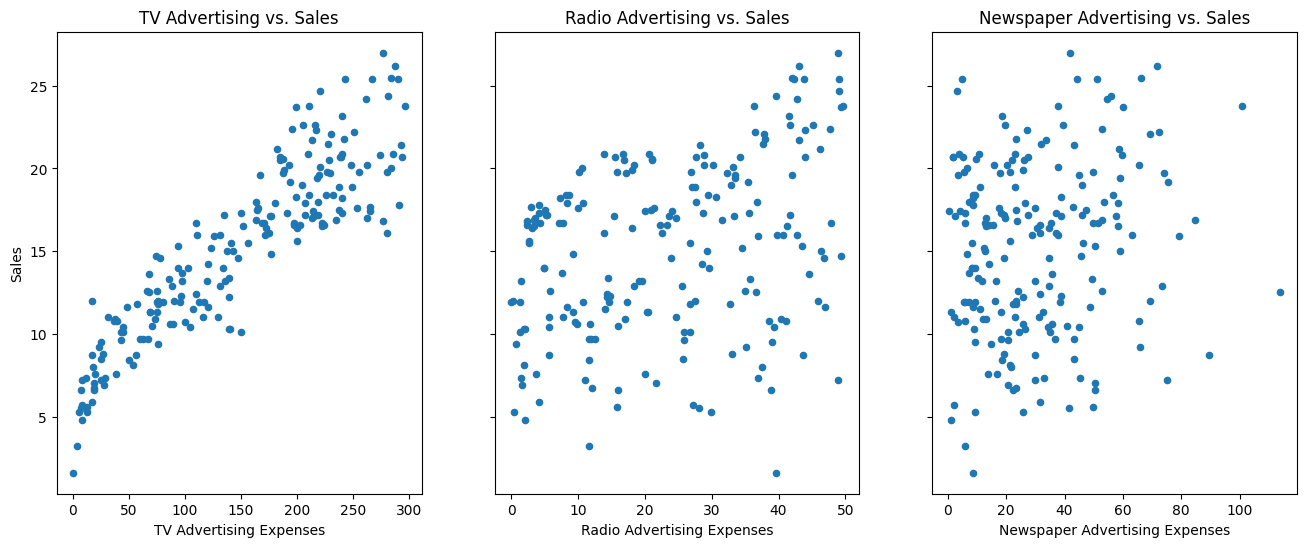

In [15]:
# Chart - 1 Scatterplot visualization code for numerical variable vs target variable
# Creating subplots with 1 row and 3 columns, sharing the y-axis for better comparison
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 6))

# Scatter plot for TV advertising expenses vs. Sales
df.plot(kind="scatter", x='TV', y='Sales', ax=axs[0])
axs[0].set_title('TV Advertising vs. Sales')
axs[0].set_xlabel('TV Advertising Expenses')
axs[0].set_ylabel('Sales')

# Scatter plot for Radio advertising expenses vs. Sales
df.plot(kind="scatter", x='Radio', y='Sales', ax=axs[1])
axs[1].set_title('Radio Advertising vs. Sales')
axs[1].set_xlabel('Radio Advertising Expenses')
axs[1].set_ylabel('Sales')

# Scatter plot for Newspaper advertising expenses vs. Sales
df.plot(kind="scatter", x='Newspaper', y='Sales', ax=axs[2])
axs[2].set_title('Newspaper Advertising vs. Sales')
axs[2].set_xlabel('Newspaper Advertising Expenses')
axs[2].set_ylabel('Sales')

# Displaying the plots
plt.show()

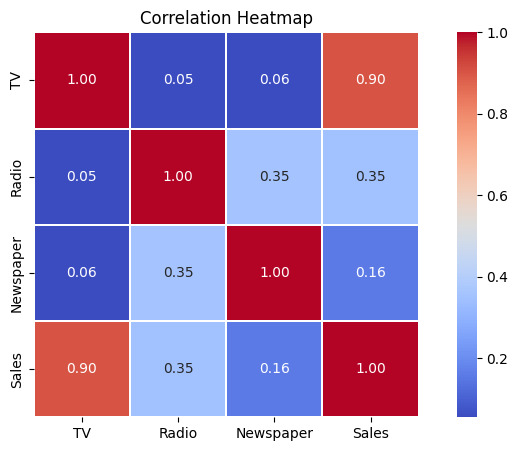

In [16]:
# Correlation Heatmap visualization code
# Set the size of the plot
plt.figure(figsize=(10, 5))

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(df.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True, cmap='coolwarm')

# Add a title to the plot
plt.title("Correlation Heatmap")

# Display the plot
plt.show()

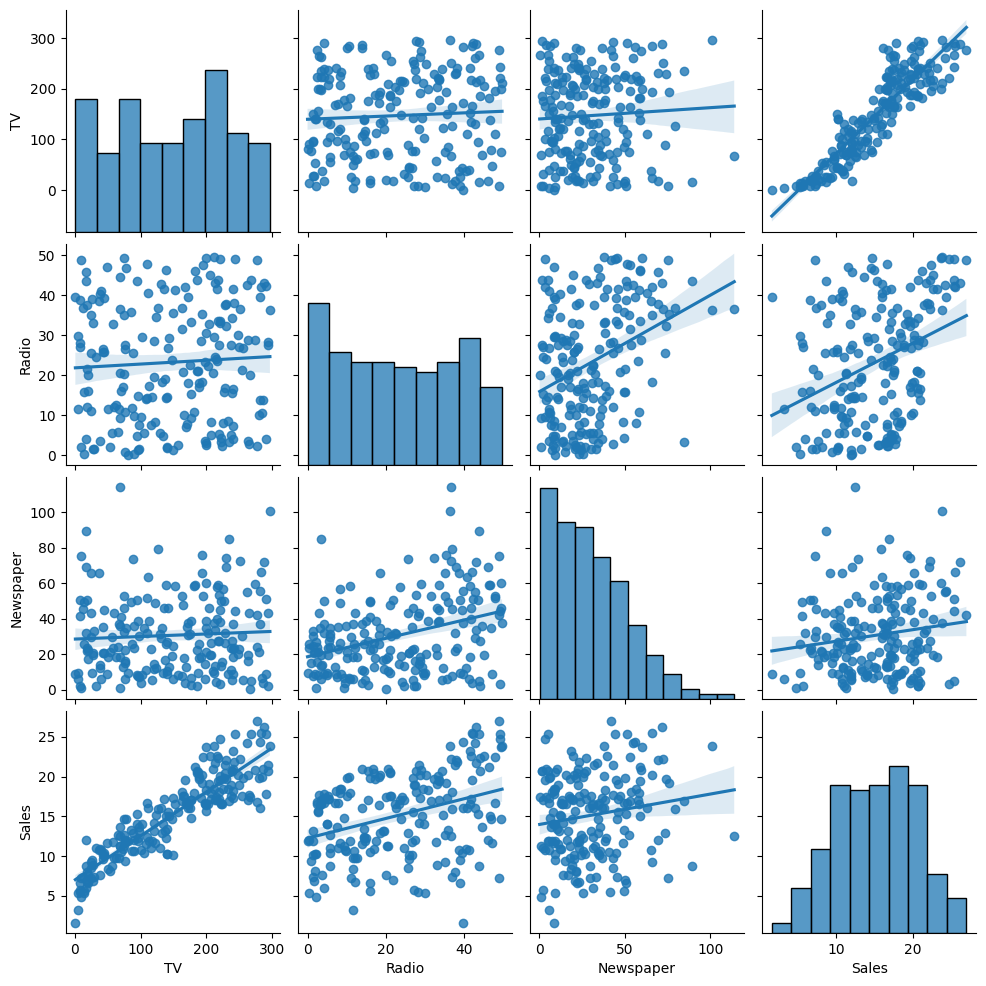

In [17]:
# Chart - 3 Pair plot visualization code
sns.pairplot(df,kind="reg");

# Display the plot
plt.show()

In [18]:
# Removing the outlier from newspaper
df=df[df['Newspaper']<=90]

In [19]:
# Select the features wisely to avoid overfitting
features = [i for i in df.columns if i not in ['Sales']]
features

['TV', 'Radio', 'Newspaper']

In [20]:
# Remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [21]:
continuous_variables = ['TV', 'Radio', 'Newspaper']

In [22]:
continuous_feature_df = pd.DataFrame(df[continuous_variables])

In [23]:
continuous_feature_df

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [24]:
calc_vif(df[[i for i in continuous_feature_df]])

,variables,VIF
0,TV,2.502183
1,Radio,3.275285
2,Newspaper,3.126386


In [25]:
# Final data for modeling
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


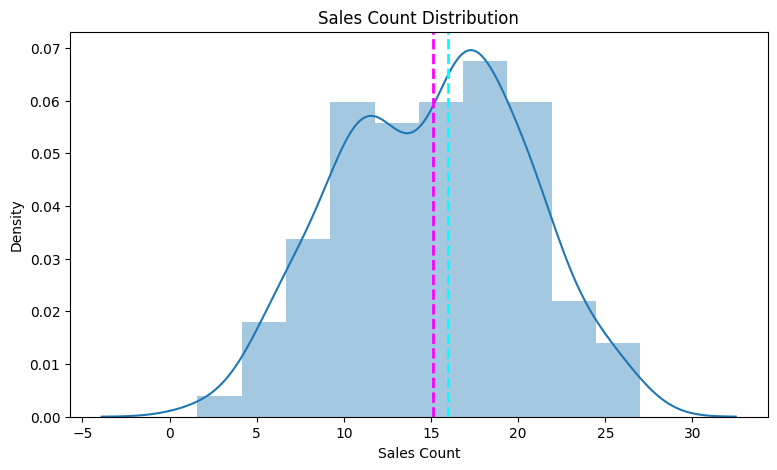

In [26]:
# Transform the data
# Visualizing the distribution of the dependent variable - Sales
plt.figure(figsize=(9,5))
sns.distplot(df[dependent_variable])
plt.xlabel('Sales Count')
plt.title('Sales Count Distribution')
plt.axvline(df[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [27]:
# Skew of the dependent variable
df[dependent_variable].skew()

,0
Sales,-0.079676


In [28]:
# Defining dependent and independent variables
X = df.drop('Sales',axis=1)
y = df[dependent_variable]

In [29]:
features

['TV', 'Radio', 'Newspaper']

In [30]:
features = [i for i in df.columns if i not in ['Sales']]

In [31]:
# Scaling your data
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

In [32]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
# Checking the train distribution of dependent variable
y_train.value_counts()

,count
Sales,
11.9,4
16.7,4
20.7,4
9.7,3
18.4,3
...,...
13.6,1
13.3,1
12.9,1


In [34]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
   and returns a list of the model scores'''

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test,y_pred)
  y_train_pred = model.predict(X_train)  # Predict the target variable for the training set
  r2_train = r2_score(y_train, y_train_pred)
  r2 = r2_score(y_test,y_pred)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values
  plt.figure(figsize=(12,4))
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Sales', fontsize=12)


  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score

In [35]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

In [36]:
# Import the LinearRegression class
reg = LinearRegression()

# Fit the linear regression model to the training data
reg.fit(X_train, y_train)

# Predict on the model
y_pred_li = reg.predict(X_test)

MSE : 2.707163751213019
RMSE : 1.6453460885822833
MAE : 1.178046614968103
Train R2 : 0.8995394667395139
Test R2 : 0.9026978637834334
Adjusted R2 :  0.8945893524320528


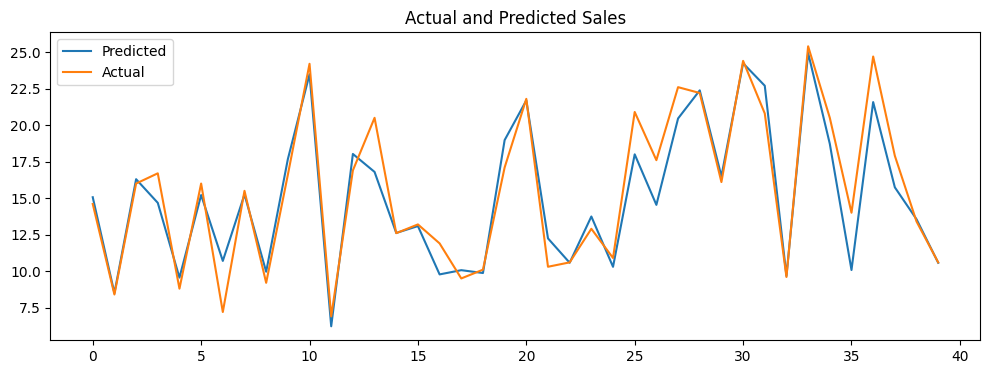

In [37]:
# Visualizing evaluation Metric Score chart
linear_score = evaluate_model(reg, y_test,y_pred_li)
score['Linear regression'] = linear_score

In [38]:
# Updated Evaluation Metric Score chart
score

,Linear regression
MSE,2.707164
RMSE,1.645346
MAE,1.178047
Train R2,0.899539
Test R2,0.902698
Adjusted R2,0.894589


In [39]:
# Define the model
reg = LinearRegression()

# Define the parameters to be optimized
param_grid = {'fit_intercept': [True, False]}

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [40]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best parameters:  {'fit_intercept': True}
Best R2 score:  0.8873819019763631


In [41]:
# Use the best parameter to train the model
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

LinearRegression()

In [42]:
# Predict on test data
y_pred_li2 = best_reg.predict(X_test)

MSE : 2.707163751213019
RMSE : 1.6453460885822833
MAE : 1.178046614968103
Train R2 : 0.8995394667395139
Test R2 : 0.9026978637834334
Adjusted R2 :  0.8945893524320528


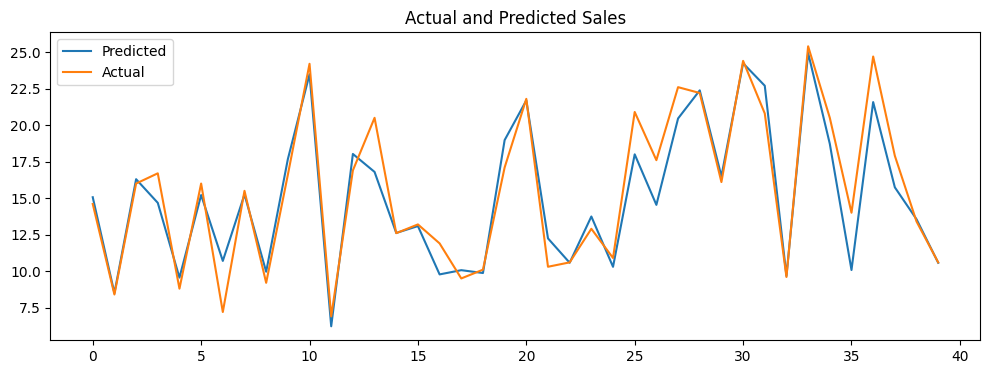

In [43]:
# Visualizing evaluation Metric Score chart
linear_score2 = evaluate_model(best_reg, y_test,y_pred_li2)

In [45]:
# Updated Evaluation Metric Score chart
score['Linear regression tuned'] = linear_score2
score

,Linear regression,Linear regression tuned
MSE,2.707164,2.707164
RMSE,1.645346,1.645346
MAE,1.178047,1.178047
Train R2,0.899539,0.899539
Test R2,0.902698,0.902698
Adjusted R2,0.894589,0.894589


In [46]:
# Import the Lasso Regression class
lasso = Lasso()

# Fit the lasso regression model to the training data
lasso.fit(X_train, y_train)

# Predict on the model
y_pred_lasso1 = lasso.predict(X_test)

MSE : 4.549466765340107
RMSE : 2.1329479049756714
MAE : 1.72551161691813
Train R2 : 0.8298466856778177
Test R2 : 0.8364809536491784
Adjusted R2 :  0.8228543664532766


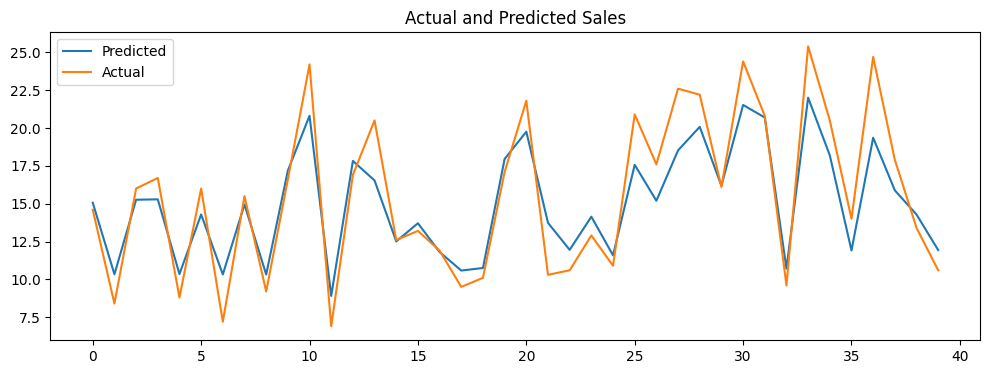

In [47]:
# Visualizing evaluation Metric Score chart
lasso_score = evaluate_model(lasso, y_test,y_pred_lasso1)
score['Lasso regression'] = lasso_score

In [48]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression
MSE,2.707164,2.707164,4.549467
RMSE,1.645346,1.645346,2.132948
MAE,1.178047,1.178047,1.725512
Train R2,0.899539,0.899539,0.829847
Test R2,0.902698,0.902698,0.836481
Adjusted R2,0.894589,0.894589,0.822854


In [49]:
# Define the model
lasso = Lasso()

# Define the parameters to be optimized & Perform grid search
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting model
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [50]:
# Getting optimum parameters
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The optimum alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -3.0171830525473147


In [51]:
# Import the Lasso Regression class with best alpha
lasso = Lasso(alpha = lasso_regressor.best_params_['alpha'])

# Fit the lasso regression model to your training data
lasso.fit(X_train, y_train)

# Predict the model
y_pred_lassocv = lasso.predict(X_test)

MSE : 2.699000079127736
RMSE : 1.642863378107789
MAE : 1.1777186775643163
Train R2 : 0.8995306678241481
Test R2 : 0.9029912862751144
Adjusted R2 :  0.8949072267980406


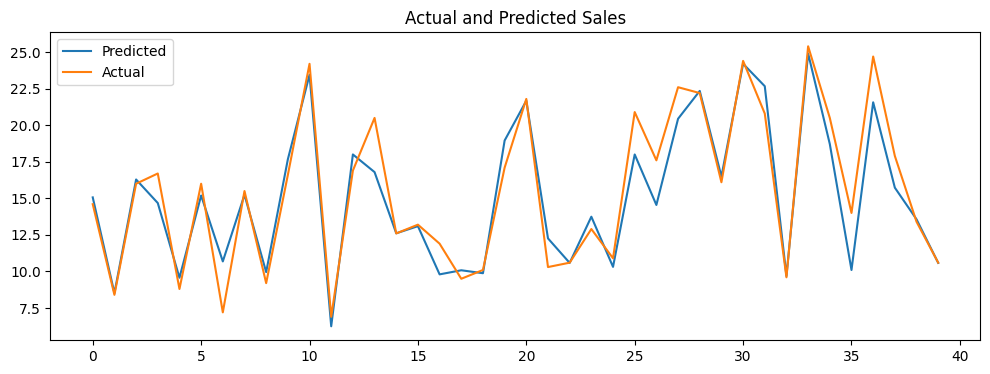

In [52]:
#Evaluation matrices for Lasso regression
lasso2 = evaluate_model(lasso, y_test,y_pred_lassocv)

name = 'Lasso with alpha = ' + str(lasso_regressor.best_params_['alpha'])

score[name] = lasso2

In [53]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01
MSE,2.707164,2.707164,4.549467,2.699000
RMSE,1.645346,1.645346,2.132948,1.642863
MAE,1.178047,1.178047,1.725512,1.177719
Train R2,0.899539,0.899539,0.829847,0.899531
Test R2,0.902698,0.902698,0.836481,0.902991
Adjusted R2,0.894589,0.894589,0.822854,0.894907


In [54]:
# Ridge regressor class
ridge = Ridge()

# Fit the ridge regression model to your training data
ridge.fit(X_train, y_train)

# Predict on the model
y_pred_ridge1 = ridge.predict(X_test)

MSE : 2.721270939060309
RMSE : 1.6496275152470963
MAE : 1.1830482336050838
Train R2 : 0.8995067154205298
Test R2 : 0.9021908166892432
Adjusted R2 :  0.8940400514133467


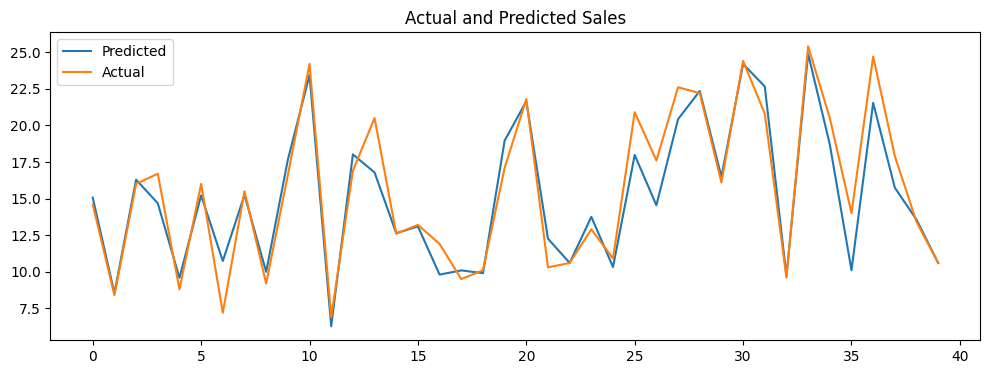

In [55]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(ridge, y_test,y_pred_ridge1)
score['Ridge'] = result

In [56]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge
MSE,2.707164,2.707164,4.549467,2.699000,2.721271
RMSE,1.645346,1.645346,2.132948,1.642863,1.649628
MAE,1.178047,1.178047,1.725512,1.177719,1.183048
Train R2,0.899539,0.899539,0.829847,0.899531,0.899507
Test R2,0.902698,0.902698,0.836481,0.902991,0.902191
Adjusted R2,0.894589,0.894589,0.822854,0.894907,0.894040


In [57]:
# Import Ridge regressor Class
ridge = Ridge()

# Define the parameters to be optimized & Perform grid search
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting model
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [58]:
# Getting optimum parameters
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -3.022426432037947


In [59]:
# Initiate ridge with best alpha
ridge = Ridge(alpha = ridge_regressor.best_params_['alpha'])

# Fit the ridge regression model to your training data
ridge.fit(X_train, y_train)

# Predict on model
y_pred_ridge = ridge.predict(X_test)

MSE : 2.721270939060309
RMSE : 1.6496275152470963
MAE : 1.1830482336050838
Train R2 : 0.8995067154205298
Test R2 : 0.9021908166892432
Adjusted R2 :  0.8940400514133467


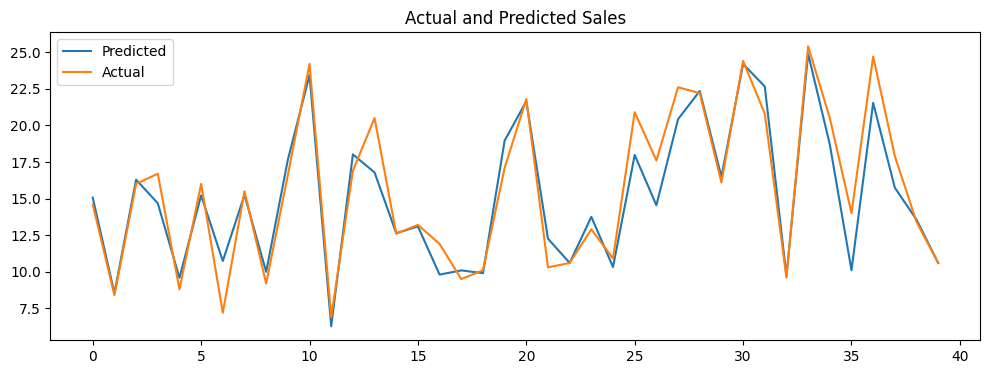

In [60]:
# Evaluation matrices for Ridge regression
result = evaluate_model(ridge, y_test,y_pred_ridge)

namer = 'Ridge with alpha = ' + str(ridge_regressor.best_params_['alpha'])

score[namer] = result

In [61]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 1
MSE,2.707164,2.707164,4.549467,2.699000,2.721271,2.721271
RMSE,1.645346,1.645346,2.132948,1.642863,1.649628,1.649628
MAE,1.178047,1.178047,1.725512,1.177719,1.183048,1.183048
Train R2,0.899539,0.899539,0.829847,0.899531,0.899507,0.899507
Test R2,0.902698,0.902698,0.836481,0.902991,0.902191,0.902191
Adjusted R2,0.894589,0.894589,0.822854,0.894907,0.894040,0.894040


In [62]:
# Import Decision Tree Regressor class
dt = DecisionTreeRegressor(random_state=1)

# Fit the Decision Tree model to your training data
dt.fit(X_train,y_train)

# Predict on the model
y_pred_dt1 = dt.predict(X_test)

MSE : 2.124249999999999
RMSE : 1.4574807031312624
MAE : 0.9974999999999998
Train R2 : 1.0
Test R2 : 0.9236492204191835
Adjusted R2 :  0.9172866554541155


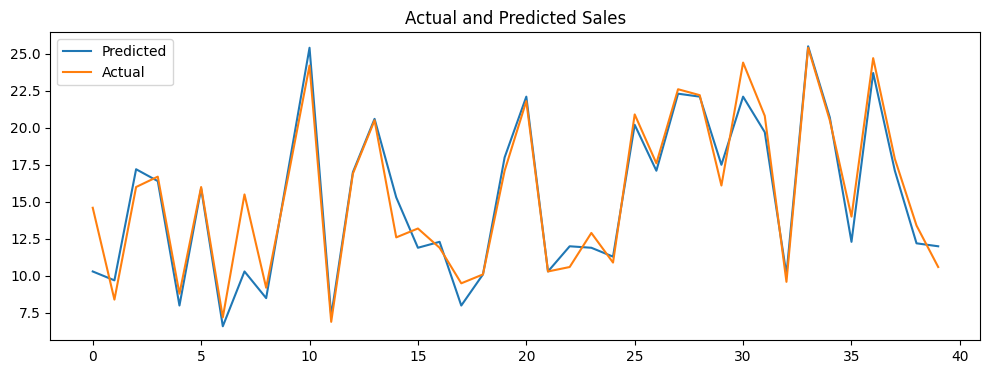

In [63]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(dt, y_test,y_pred_dt1)
score['Decision tree'] = result

In [64]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 1,Decision tree
MSE,2.707164,2.707164,4.549467,2.699000,2.721271,2.721271,2.124250
RMSE,1.645346,1.645346,2.132948,1.642863,1.649628,1.649628,1.457481
MAE,1.178047,1.178047,1.725512,1.177719,1.183048,1.183048,0.997500
Train R2,0.899539,0.899539,0.829847,0.899531,0.899507,0.899507,1.000000
Test R2,0.902698,0.902698,0.836481,0.902991,0.902191,0.902191,0.923649
Adjusted R2,0.894589,0.894589,0.822854,0.894907,0.894040,0.894040,0.917287


In [65]:
# Regressor
dt_model = DecisionTreeRegressor(random_state=1)

# Hyperparameter Grid
grid = {'max_depth' : [8,10,12,14,16],
        'min_samples_split' : np.arange(35,50),
        'min_samples_leaf' : np.arange(22,31,2)}

# Fitting model with hypertuned paramaters using grid search
dt_gridsearch = GridSearchCV(dt_model,
                             grid,
                             cv=6,
                             scoring= 'neg_root_mean_squared_error')
dt_gridsearch.fit(X_train,y_train)
dt_best_params = dt_gridsearch.best_params_

In [66]:
dt_best_params

{'max_depth': 8, 'min_samples_leaf': 22, 'min_samples_split': 35}

In [67]:
# Building Decision Tree model with best parameters
dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'],
                                 min_samples_leaf=dt_best_params['min_samples_leaf'],
                                 min_samples_split=dt_best_params['min_samples_split'],
                                 random_state=1)

In [68]:
# Fitting model
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=22, min_samples_split=35,
                      random_state=1)

In [69]:
# Predict on the model
y_pred_dt = dt_model.predict(X_test)

MSE : 3.7568757495836707
RMSE : 1.938266170984695
MAE : 1.660795454545455
Train R2 : 0.8673845681918143
Test R2 : 0.8649686278597257
Adjusted R2 :  0.8537160135147028


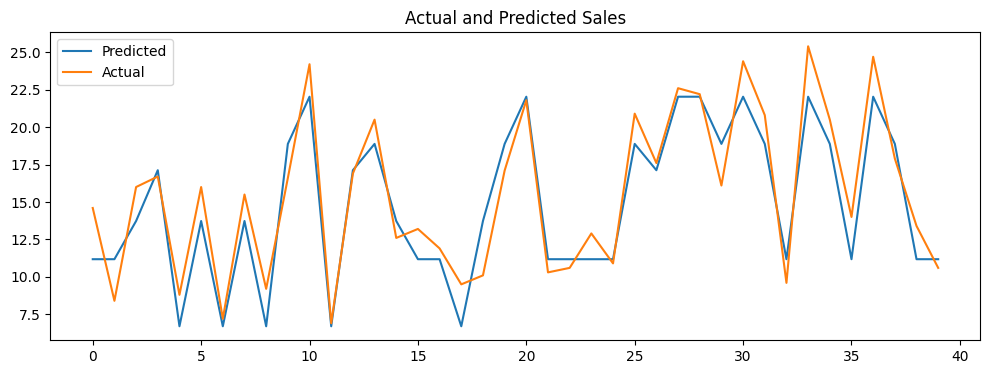

In [70]:
# Evaluation matrices for DecisionTree
result = evaluate_model(dt_model, y_test,y_pred_dt)
score['Decision tree tuned'] = result

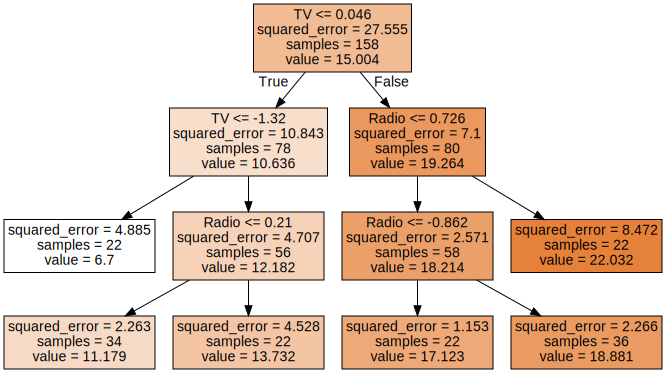

In [71]:
# Decision tree diagram
graph = Source(tree.export_graphviz(dt_model,
                                    out_file=None,
                                    feature_names=features,
                                    filled= True))
display(SVG(graph.pipe(format='svg')))

In [72]:
# Updated Evaluation Metric Score Chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 1,Decision tree,Decision tree tuned
MSE,2.707164,2.707164,4.549467,2.699000,2.721271,2.721271,2.124250,3.756876
RMSE,1.645346,1.645346,2.132948,1.642863,1.649628,1.649628,1.457481,1.938266
MAE,1.178047,1.178047,1.725512,1.177719,1.183048,1.183048,0.997500,1.660795
Train R2,0.899539,0.899539,0.829847,0.899531,0.899507,0.899507,1.000000,0.867385
Test R2,0.902698,0.902698,0.836481,0.902991,0.902191,0.902191,0.923649,0.864969
Adjusted R2,0.894589,0.894589,0.822854,0.894907,0.894040,0.894040,0.917287,0.853716


In [73]:
# Import Random Forest Regressor class
rf = RandomForestRegressor(random_state=0)

# Fit the Random Forest model to your training data
rf.fit(X_train,y_train)

# Predict on the model
y_pred_rf1 = rf.predict(X_test)

MSE : 1.2971672249999986
RMSE : 1.1389324936096954
MAE : 0.9316249999999988
Train R2 : 0.992395422139882
Test R2 : 0.9533766134516021
Adjusted R2 :  0.9494913312392356


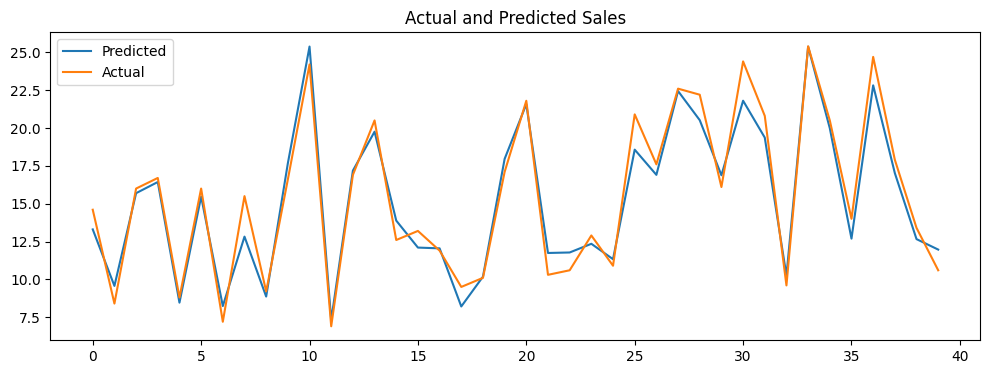

In [74]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(rf, y_test,y_pred_rf1)
score['Random forest'] = result

In [75]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 1,Decision tree,Decision tree tuned,Random forest
MSE,2.707164,2.707164,4.549467,2.699000,2.721271,2.721271,2.124250,3.756876,1.297167
RMSE,1.645346,1.645346,2.132948,1.642863,1.649628,1.649628,1.457481,1.938266,1.138932
MAE,1.178047,1.178047,1.725512,1.177719,1.183048,1.183048,0.997500,1.660795,0.931625
Train R2,0.899539,0.899539,0.829847,0.899531,0.899507,0.899507,1.000000,0.867385,0.992395
Test R2,0.902698,0.902698,0.836481,0.902991,0.902191,0.902191,0.923649,0.864969,0.953377
Adjusted R2,0.894589,0.894589,0.822854,0.894907,0.894040,0.894040,0.917287,0.853716,0.949491


In [76]:
# Random forest model
rf_model = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':[300],                    # limited due to computational power availability
             'min_samples_leaf':np.arange(20,25)}     # Approximate range from a decision tree model

In [77]:
# Fitting a Random Forest model with best parameters obtained from gridsearch
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=6,scoring='neg_root_mean_squared_error')
rf_gridsearch.fit(X_train,y_train)
rf_best_params = rf_gridsearch.best_params_

In [78]:
# Best parameters for random forests
rf_best_params

{'min_samples_leaf': 20, 'n_estimators': 300}

In [79]:
# Building Random Forest model with best parameters
rf_model = RandomForestRegressor(n_estimators=rf_best_params['n_estimators'],
                                 min_samples_leaf=rf_best_params['min_samples_leaf'],
                                 random_state=0)

In [80]:
# Fitting model
rf_model.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=20, n_estimators=300, random_state=0)

In [81]:
# Predict on the model
y_pred_rf = rf_model.predict(X_test)

MSE : 3.80690408745294
RMSE : 1.9511289264046443
MAE : 1.5860930158665578
Train R2 : 0.8442772759482514
Test R2 : 0.8631704861167806
Adjusted R2 :  0.8517680266265123


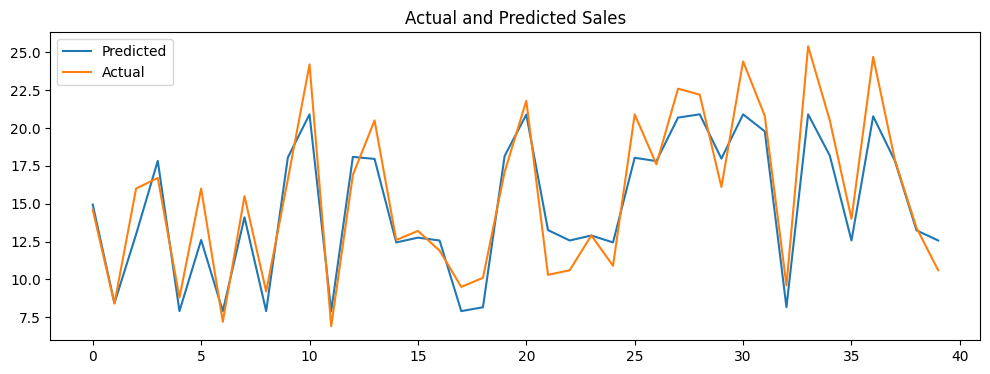

In [82]:
# Evaluation matrices for RandomForest
result = evaluate_model(rf_model, y_test,y_pred_rf)
score['Random forest tuned'] = result

In [83]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 1,Decision tree,Decision tree tuned,Random forest,Random forest tuned
MSE,2.707164,2.707164,4.549467,2.699000,2.721271,2.721271,2.124250,3.756876,1.297167,3.806904
RMSE,1.645346,1.645346,2.132948,1.642863,1.649628,1.649628,1.457481,1.938266,1.138932,1.951129
MAE,1.178047,1.178047,1.725512,1.177719,1.183048,1.183048,0.997500,1.660795,0.931625,1.586093
Train R2,0.899539,0.899539,0.829847,0.899531,0.899507,0.899507,1.000000,0.867385,0.992395,0.844277
Test R2,0.902698,0.902698,0.836481,0.902991,0.902191,0.902191,0.923649,0.864969,0.953377,0.863170
Adjusted R2,0.894589,0.894589,0.822854,0.894907,0.894040,0.894040,0.917287,0.853716,0.949491,0.851768


In [84]:
# Import Gradient Boosting Regressor class
gb = GradientBoostingRegressor(random_state=0)

# Fit the Gradient Boosting model to the training data
gb.fit(X_train,y_train)

# Predict on the model
y_pred_gb1 = gb.predict(X_test)

MSE : 1.3239989582738843
RMSE : 1.1506515364235534
MAE : 0.9465592793152358
Train R2 : 0.9934809089802722
Test R2 : 0.9524122148389313
Adjusted R2 :  0.9484465660755089


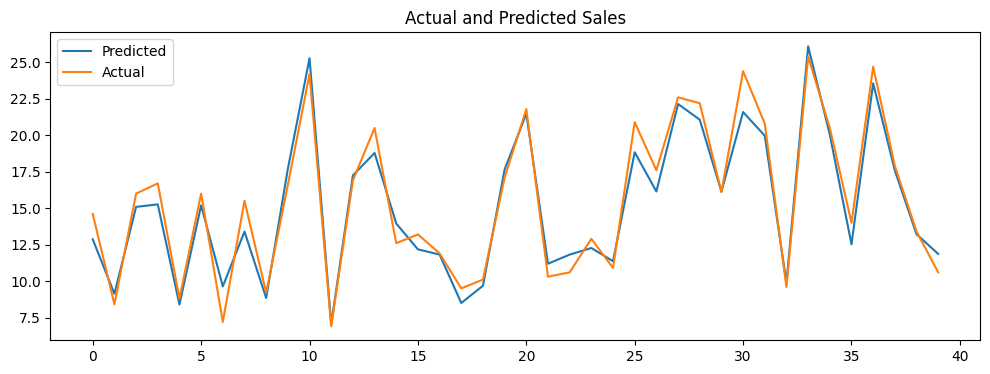

In [85]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(gb, y_test,y_pred_gb1)
score['Gradient Boosting Regressor'] = result

In [86]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 1,Decision tree,Decision tree tuned,Random forest,Random forest tuned,Gradient Boosting Regressor
MSE,2.707164,2.707164,4.549467,2.699000,2.721271,2.721271,2.124250,3.756876,1.297167,3.806904,1.323999
RMSE,1.645346,1.645346,2.132948,1.642863,1.649628,1.649628,1.457481,1.938266,1.138932,1.951129,1.150652
MAE,1.178047,1.178047,1.725512,1.177719,1.183048,1.183048,0.997500,1.660795,0.931625,1.586093,0.946559
Train R2,0.899539,0.899539,0.829847,0.899531,0.899507,0.899507,1.000000,0.867385,0.992395,0.844277,0.993481
Test R2,0.902698,0.902698,0.836481,0.902991,0.902191,0.902191,0.923649,0.864969,0.953377,0.863170,0.952412
Adjusted R2,0.894589,0.894589,0.822854,0.894907,0.894040,0.894040,0.917287,0.853716,0.949491,0.851768,0.948447


In [87]:
# Gradient Boosting Model
gb_model = GradientBoostingRegressor(random_state=0)
gb_params = {'n_estimators':[300],
             'min_samples_leaf':np.arange(20,24),
             'max_depth':np.arange(14,17)
             }

In [88]:
# Perform the randomized search
random_search = RandomizedSearchCV(gb_model, param_distributions=gb_params, cv=6, n_iter=20, scoring='neg_root_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)

gb_best_params = random_search.best_params_

In [89]:
# Best parameters for Gradient Boosting Model
gb_best_params

{'n_estimators': 300, 'min_samples_leaf': 20, 'max_depth': 14}

In [90]:
# Building Gradient Boosting Model with best parameters
gb_model = GradientBoostingRegressor(n_estimators=gb_best_params['n_estimators'],
                                     min_samples_leaf=gb_best_params['min_samples_leaf'],
                                     max_depth = gb_best_params['max_depth'],
                                     random_state=0)

In [91]:
# Fitting model
gb_model.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=14, min_samples_leaf=20, n_estimators=300,
                          random_state=0)

In [92]:
# Predict on the Model
y_pred_gb = gb_model.predict(X_test)

MSE : 2.0455068279355166
RMSE : 1.4302121618611403
MAE : 1.1532214432903913
Train R2 : 0.9881694533237972
Test R2 : 0.9264794440622526
Adjusted R2 :  0.9203527310674403


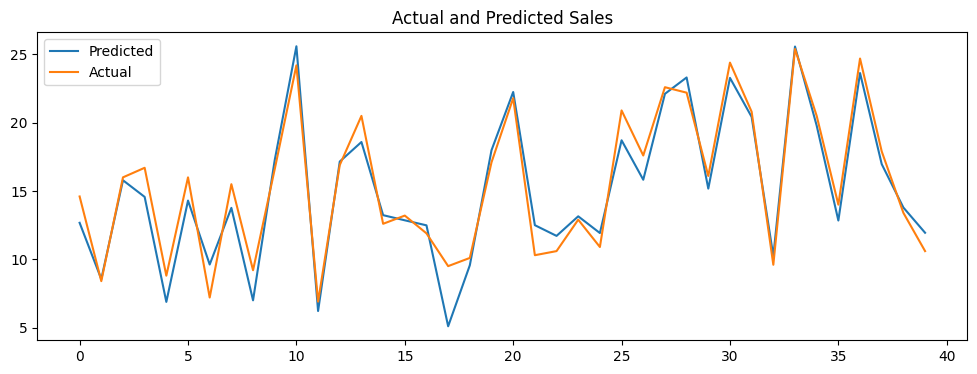

In [93]:
# Evaluation matrices for GradientBoosting
result = evaluate_model(gb_model, y_test,y_pred_gb)
score['Gradient Boosting Regressor Tuned'] = result

In [94]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 1,Decision tree,Decision tree tuned,Random forest,Random forest tuned,Gradient Boosting Regressor,Gradient Boosting Regressor Tuned
MSE,2.707164,2.707164,4.549467,2.699000,2.721271,2.721271,2.124250,3.756876,1.297167,3.806904,1.323999,2.045507
RMSE,1.645346,1.645346,2.132948,1.642863,1.649628,1.649628,1.457481,1.938266,1.138932,1.951129,1.150652,1.430212
MAE,1.178047,1.178047,1.725512,1.177719,1.183048,1.183048,0.997500,1.660795,0.931625,1.586093,0.946559,1.153221
Train R2,0.899539,0.899539,0.829847,0.899531,0.899507,0.899507,1.000000,0.867385,0.992395,0.844277,0.993481,0.988169
Test R2,0.902698,0.902698,0.836481,0.902991,0.902191,0.902191,0.923649,0.864969,0.953377,0.863170,0.952412,0.926479
Adjusted R2,0.894589,0.894589,0.822854,0.894907,0.894040,0.894040,0.917287,0.853716,0.949491,0.851768,0.948447,0.920353


In [95]:
# Import Extreme Gradient Boosting Regressor class
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')

# Fit the Extreme Gradient Boosting model to the training data
xgb_model.fit(X_train,y_train)

# Predict on the model
y_pred_xgb1 = xgb_model.predict(X_test)

MSE : 1.4965120950207438
RMSE : 1.2233201114265815
MAE : 0.9038401961326599
Train R2 : 0.9999998807907104
Test R2 : 0.9462116956710815
Adjusted R2 :  0.941729336977005


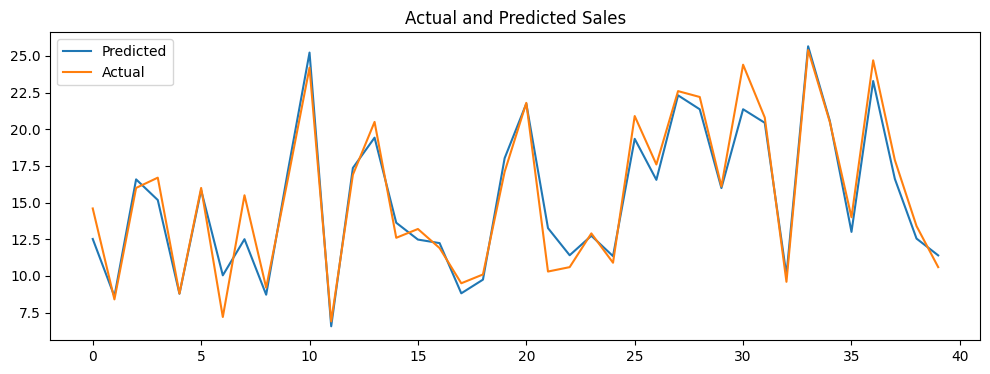

In [96]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(xgb_model, y_test,y_pred_xgb1)
score['Extreme Gradient Boosting Regressor'] = result

In [97]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 1,Decision tree,Decision tree tuned,Random forest,Random forest tuned,Gradient Boosting Regressor,Gradient Boosting Regressor Tuned,Extreme Gradient Boosting Regressor
MSE,2.707164,2.707164,4.549467,2.699000,2.721271,2.721271,2.124250,3.756876,1.297167,3.806904,1.323999,2.045507,1.496512
RMSE,1.645346,1.645346,2.132948,1.642863,1.649628,1.649628,1.457481,1.938266,1.138932,1.951129,1.150652,1.430212,1.223320
MAE,1.178047,1.178047,1.725512,1.177719,1.183048,1.183048,0.997500,1.660795,0.931625,1.586093,0.946559,1.153221,0.903840
Train R2,0.899539,0.899539,0.829847,0.899531,0.899507,0.899507,1.000000,0.867385,0.992395,0.844277,0.993481,0.988169,1.000000
Test R2,0.902698,0.902698,0.836481,0.902991,0.902191,0.902191,0.923649,0.864969,0.953377,0.863170,0.952412,0.926479,0.946212
Adjusted R2,0.894589,0.894589,0.822854,0.894907,0.894040,0.894040,0.917287,0.853716,0.949491,0.851768,0.948447,0.920353,0.941729


In [98]:
# XG boost model
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')
xgb_params = {'n_estimators':[500],
             'min_samples_leaf':np.arange(20,22)}

In [99]:
# Perform the randomized search
xgb_search = RandomizedSearchCV(xgb_model,xgb_params,cv=6,scoring='neg_root_mean_squared_error',n_iter=100, n_jobs=-1)
xgb_search.fit(X_train,y_train)
xgb_best_params = xgb_search.best_params_

In [100]:
# Best parameters for XG boost Model
xgb_best_params

{'n_estimators': 500, 'min_samples_leaf': 20}

In [101]:
# Building a XG boost model with best parameters
xgb_model = xgb.XGBRegressor(n_estimators=xgb_best_params['n_estimators'],
                             min_samples_leaf=xgb_best_params['min_samples_leaf'],
                             random_state=0)

In [102]:
# Fitting model
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, min_samples_leaf=20, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [103]:
# Predict on the model
y_pred_xgb = xgb_model.predict(X_test)

MSE : 1.4965713236271934
RMSE : 1.2233443193259996
MAE : 0.9038172006607056
Train R2 : 0.9999999403953552
Test R2 : 0.9462095499038696
Adjusted R2 :  0.9417270123958588


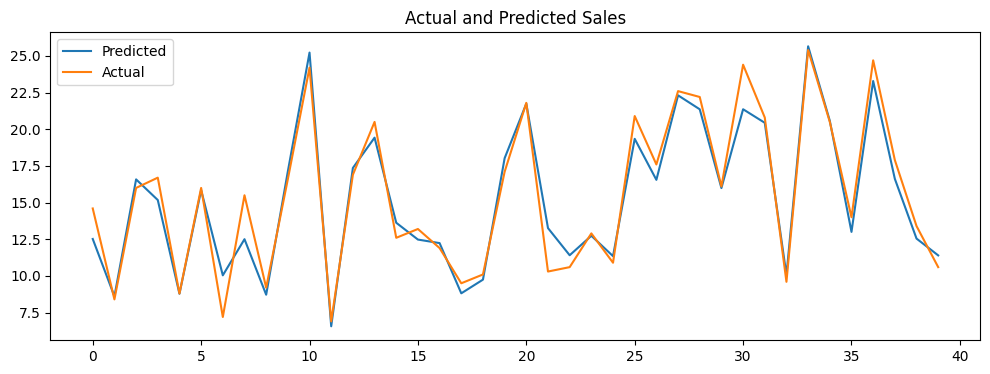

In [104]:
# Evaluation matrices for XGBRegressor
result = evaluate_model(xgb_model, y_test,y_pred_xgb)
score['Extreme Gradient Boosting Regressor Tuned'] = result

In [105]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 1,Decision tree,Decision tree tuned,Random forest,Random forest tuned,Gradient Boosting Regressor,Gradient Boosting Regressor Tuned,Extreme Gradient Boosting Regressor,Extreme Gradient Boosting Regressor Tuned
MSE,2.707164,2.707164,4.549467,2.699000,2.721271,2.721271,2.124250,3.756876,1.297167,3.806904,1.323999,2.045507,1.496512,1.496571
RMSE,1.645346,1.645346,2.132948,1.642863,1.649628,1.649628,1.457481,1.938266,1.138932,1.951129,1.150652,1.430212,1.223320,1.223344
MAE,1.178047,1.178047,1.725512,1.177719,1.183048,1.183048,0.997500,1.660795,0.931625,1.586093,0.946559,1.153221,0.903840,0.903817
Train R2,0.899539,0.899539,0.829847,0.899531,0.899507,0.899507,1.000000,0.867385,0.992395,0.844277,0.993481,0.988169,1.000000,1.000000
Test R2,0.902698,0.902698,0.836481,0.902991,0.902191,0.902191,0.923649,0.864969,0.953377,0.863170,0.952412,0.926479,0.946212,0.946210
Adjusted R2,0.894589,0.894589,0.822854,0.894907,0.894040,0.894040,0.917287,0.853716,0.949491,0.851768,0.948447,0.920353,0.941729,0.941727


After tuning the model i have got the same accuracy on train and test data. Both are overfitted model.

In [ ]:
print(score.to_markdown())

|             |   Linear regression |   Linear regression tuned |   Lasso regression |   Lasso with alpha = 0.01 |    Ridge |   Ridge with alpha = 1 |   Decision tree |   Decision tree tuned |   Random forest |   Random forest tuned |   Gradient Boosting Regressor |   Gradient Boosting Regressor Tuned |   Extreme Gradient Boosting Regressor |   Extreme Gradient Boosting Regressor Tuned |
|:------------|--------------------:|--------------------------:|-------------------:|--------------------------:|---------:|-----------------------:|----------------:|----------------------:|----------------:|----------------------:|------------------------------:|------------------------------------:|--------------------------------------:|--------------------------------------------:|
| MSE         |            2.43208  |                  2.43208  |           4.4122   |                  2.42386  | 2.44805  |               2.44805  |        1.32225  |              4.85393  |        0.558737 |        

In [106]:
score.columns

Index(['Linear regression', 'Linear regression tuned', 'Lasso regression',
       'Lasso with alpha = 0.01', 'Ridge', 'Ridge with alpha = 1',
       'Decision tree', 'Decision tree tuned', 'Random forest',
       'Random forest tuned', 'Gradient Boosting Regressor',
       'Gradient Boosting Regressor Tuned',
       'Extreme Gradient Boosting Regressor',
       'Extreme Gradient Boosting Regressor Tuned'],
      dtype='object')

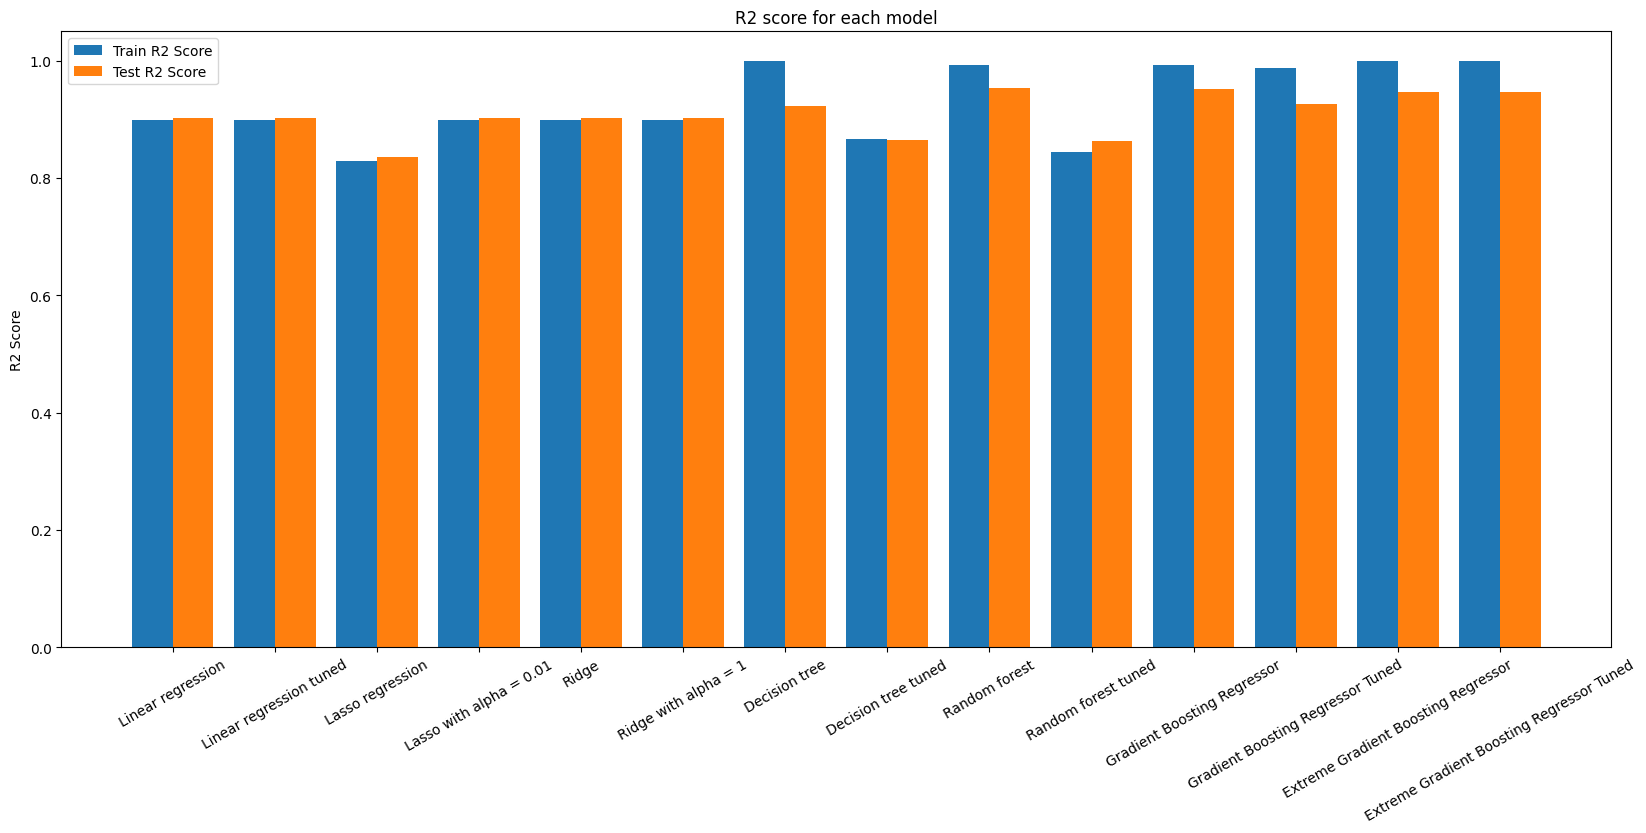

In [107]:
# R2 Scores plot

models = list(score.columns)
train = score.iloc[-3,:]
test = score.iloc[-2,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(20,8))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train R2 Score')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test R2 Score')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("R2 Score")
plt.title("R2 score for each model")
plt.legend()
plt.show()

## ***Selection of best model***

In [108]:
# Removing the overfitted models which have R2 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Train R2']==1].index  # creating a list of models which have 1 for train and score_t['Train R2']==1.0
remove_models

adj = score_t.drop(remove_models)                     # creating a new dataframe with required models
adj

,MSE,RMSE,MAE,Train R2,Test R2,Adjusted R2
Linear regression,2.707164,1.645346,1.178047,0.899539,0.902698,0.894589
Linear regression tuned,2.707164,1.645346,1.178047,0.899539,0.902698,0.894589
Lasso regression,4.549467,2.132948,1.725512,0.829847,0.836481,0.822854
Lasso with alpha = 0.01,2.699000,1.642863,1.177719,0.899531,0.902991,0.894907
Ridge,2.721271,1.649628,1.183048,0.899507,0.902191,0.894040
Ridge with alpha = 1,2.721271,1.649628,1.183048,0.899507,0.902191,0.894040
Decision tree tuned,3.756876,1.938266,1.660795,0.867385,0.864969,0.853716
Random forest,1.297167,1.138932,0.931625,0.992395,0.953377,0.949491
Random forest tuned,3.806904,1.951129,1.586093,0.844277,0.863170,0.851768
Gradient Boosting Regressor,1.323999,1.150652,0.946559,0.993481,0.952412,0.948447


In [109]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df['Test ' + metric].max()
        best_model_test = df[df['Test ' + metric] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [110]:
metrics = ['R2']

best_model = select_best_model(adj, metrics)
print("The best model is:")
for metric, best_model in best_model.items():
    print(f"{metric}: {best_model} - {adj['Test '+metric][best_model].round(4)}")

The best model is:
R2: Random forest - 0.9534


In [111]:
# Take R2 score as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Train R2']==1].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['MSE','RMSE','MAE','Adjusted R2'], axis=1)
new_score.index.name = 'Regression Model'
print(new_score.to_markdown())

| Regression Model                          |   Train R2 |   Test R2 |
|:------------------------------------------|-----------:|----------:|
| Linear regression                         |   0.899539 |  0.902698 |
| Linear regression tuned                   |   0.899539 |  0.902698 |
| Lasso regression                          |   0.829847 |  0.836481 |
| Lasso with alpha = 0.01                   |   0.899531 |  0.902991 |
| Ridge                                     |   0.899507 |  0.902191 |
| Ridge with alpha = 1                      |   0.899507 |  0.902191 |
| Decision tree tuned                       |   0.867385 |  0.864969 |
| Random forest                             |   0.992395 |  0.953377 |
| Random forest tuned                       |   0.844277 |  0.86317  |
| Gradient Boosting Regressor               |   0.993481 |  0.952412 |
| Gradient Boosting Regressor Tuned         |   0.988169 |  0.926479 |
| Extreme Gradient Boosting Regressor       |   1        |  0.946212 |
| Extr